# Exploratory Data Analysis (EDA)
## Stroke Risk Prediction Dataset

This notebook performs an exploratory analysis of the stroke dataset, with a focus on:

- Dataset structure and class imbalance
- Age distribution and its association with stroke
- BMI missingness patterns and potential implications

The goal is to understand data characteristics before designing a preprocessing and modeling strategy.

## 1. Data Loading and Overview

In [3]:
# Core
import pandas as pd
import numpy as np

# Visualization (for evaluation later)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style("whitegrid")

In [5]:
# Load dataset from raw data directory
path = "../data/raw/"
file_name = "healthcare-dataset-stroke-data.csv"

df = pd.read_csv(path+file_name)

In [6]:
# Display dataset dimensions and preview first five rows
print(f"{df.shape[0]} rows x {df.shape[1]} columns")

df.head()

5110 rows x 12 columns


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# Inspect column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# Summary statistics for numerical variables
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
# Examine class imbalance in target variable
df["stroke"].value_counts(normalize=True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [10]:
# Get number of missing values per column
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Questions we can answer so far:
1. **How big is the dataset?** 5110 rows x 12 columns (61320 cells)

2. **How imbalanced is it regarding the target variable?** Severly imbalanced, 95.1% of patients in the dataset not having a stroke event; whilst only 4.9% of the patients did have a stroke event.

3. **What are the variable types?** Most of the variables are of type 'object' (string), then we have 'int' type (which includes the target variable), and finally some columns are of type 'float'.

4. **Where are the missing values?** Missing values are in the column 'bmi', which holds 201 missing values.

## 2. Target Variable Analysis

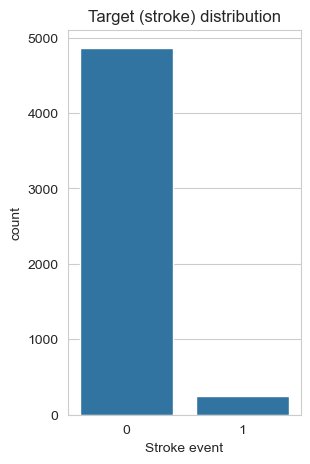

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


<Figure size 640x480 with 0 Axes>

In [14]:
# Target distribution plot
plt.figure(figsize=(3,5))
sns.countplot(data=df, x="stroke")

plt.title("Target (stroke) distribution")
plt.xlabel("Stroke event")
plt.show()
plt.savefig("target_distribution.png")
print(df["stroke"].value_counts(normalize=True))

## 3. Age and Stroke Relationship

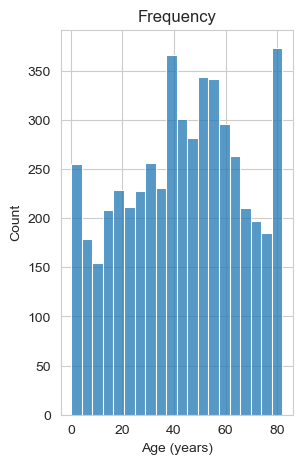

<Figure size 640x480 with 0 Axes>

In [16]:
# Age distribution histogram
plt.figure(figsize=(3,5))
sns.histplot(data=df, x="age", bins=20)

plt.title("Frequency")
plt.xlabel("Age (years)")
plt.show()
plt.savefig("age_freq_distribution.png")

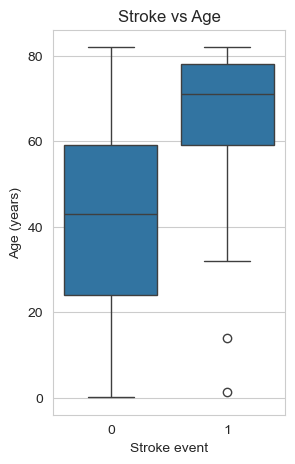

In [31]:
# Stroke vs Age boxplot
plt.figure(figsize=(3,5))
sns.boxplot(data=df, x="stroke", y="age")

plt.title("Stroke vs Age")
plt.xlabel("Stroke event")
plt.ylabel("Age (years)")
plt.savefig("stroke_vs_age.png")
plt.show()

## Questions we can answer so far:
1. **Are stroke patients older?**
Yes. Stroke events are predominantly concentrated among older patients, with the interquartile range (IQR) roughly between 60 and 75 years. This pattern is consistent with established epidemiological evidence, where age is a major risk factor for stroke.

2. **Is there a clear median difference?**
Yes. The median age among patients who experienced a stroke is approximately 70 years, compared to roughly 40 years in patients who did not. This substantial separation suggests that age is likely to be a strong predictive feature in subsequent modeling.

3. **Is there visible overlap between groups?**
There is some overlap, particularly between ages 30 and 60. While stroke risk increases with age, the presence of overlap indicates that age alone is insufficient to discriminate perfectly between groups. Additional clinical variables will likely contribute meaningfully to prediction.

4. **Are there outliers?**
Yes. Two notable outliers appear among stroke cases: one patient aged 14 years and another aged 1.32 years. Although pediatric stroke is rare but biologically possible, these observations warrant further scrutiny to assess whether they represent valid cases or potential data artifacts.

## 4. BMI Missingness Analysis

In [23]:
# Create a bmi_missing flag column
df["bmi_missing"] = df["bmi"].isna()

In [25]:
# Overall missing BMI percentage
bmi_missing_pct = df["bmi"].isna().mean() * 100
print(f"Overall BMI missingness: {bmi_missing_pct:.2f}%")

# Missing BMI by stroke status
bmi_missing_by_stroke = (
    df.groupby("stroke")["bmi"]
    .apply(lambda x: x.isna().mean() * 100)
)

bmi_missing_by_stroke

Overall BMI missingness: 3.93%


stroke
0     3.312076
1    16.064257
Name: bmi, dtype: float64

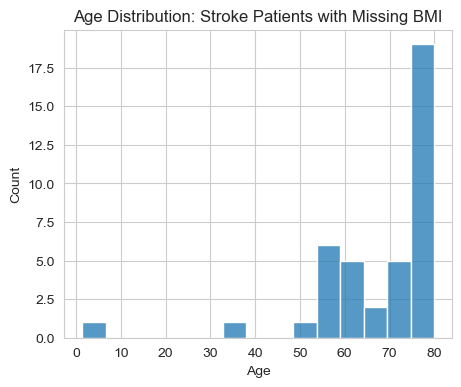

In [27]:
# Age distribution among stroke patients with missing BMI
stroke_bmi_missing = df[(df["stroke"] == 1) & (df["bmi_missing"] == True)]

plt.figure(figsize=(5,4))
sns.histplot(stroke_bmi_missing["age"], bins=15)
plt.title("Age Distribution: Stroke Patients with Missing BMI")
plt.xlabel("Age")
plt.show()

# Exploratory Data Analysis — Summary
## 1. Dataset Overview
The dataset contains 5,110 patient records and 12 variables, including demographic, clinical, and lifestyle features. The target variable (stroke) is binary.

The dataset is severely imbalanced:
- 95.1% no stroke
- 4.9% stroke

(Imbalance ratio ≈ 19:1)

## 2. Age and Stroke
Age shows a strong association with stroke occurrence:
- Median age (stroke) ≈ 70 years
- Median age (no stroke) ≈ 40 years
- Stroke cases are concentrated in older age groups (IQR ~60–75)

Although there is some overlap between groups (particularly between 30–60 years), age appears to be a dominant predictive feature.

Two pediatric outliers (ages 1.32 and 14) were observed among stroke cases. While rare, pediatric stroke is biologically possible; therefore, no immediate exclusion was performed.

## 3. BMI and Missingness
BMI contains 201 missing values (3.9% overall).
However, missingness is unevenly distributed:
- 3.3% of no-stroke patients have missing BMI
- 16.1% of stroke patients have missing BMI

Furthermore, stroke patients with missing BMI tend to be older (median ~75 years), with clustering in the 70–80 age range.

This suggests BMI is not missing completely at random (MCAR) and that missingness may carry information.

## 4.Key Observations
- Severe class imbalance requires careful evaluation strategy.
- Age is a strong discriminative feature.
- BMI missingness appears structured and potentially informative.
- The dataset is observational; no causal claims can be made.